In [1]:
%load_ext autoreload
%autoreload 2

In [72]:
from fastqaoa import optimize_qaoa_lbfgs, qaoa, optimize_qaoa_adam, Diagonals
from fastqaoa.params import init_linear
from fastqaoa.ctypes.qaoa import multi_energy


from fastqaoa.optimize import grid_search

from problems import IntegerKnapsack

import numpy as np
import matplotlib.pyplot as plt

In [240]:
instance = IntegerKnapsack.get_instances()[12][1]
# instance.quad_penalty_cost()
# print(instance._penalty)

# instance = IntegerKnapsack(id=-1, n_qubits=1, weights=[1, 1], costs=[2, 1], max_capacity=1)

instance.quad_penalty_cost()
instance._penalty

16.0

In [241]:
def opt_fun_for_instance(instance, depth=1):
    scale = sum(instance.costs) / len(instance.costs)

    cost = instance.masked_cost()
    print(cost.min_val)

    x = np.isclose(cost.min_val, cost.to_numpy()).astype(float)
    x /= np.sum(x)
    cost2 = Diagonals.from_numpy(-x)

    def fun(pf):
        beta, gamma = init_linear(depth)
        # print(pf)
        dg = instance.quad_penalty_cost(pf)
        # plt.hist(dg.to_numpy(), bins=100)
        # plt.yscale("log")
        # plt.show()
        # print(dg.min_val)
        dg = dg / scale
        # betas, gammas = grid_search(dg, cost, dim_num=100)

        betas, gammas = np.zeros()
        res = optimize_qaoa_lbfgs(dg, dg, betas, gammas)
        # print(res)
        return cost2.expec(qaoa(dg, [betas], [gammas]))

    return fun

In [242]:
f = opt_fun_for_instance(instance)

-188.0


In [250]:
import cross_entropy_method as cem

ce = cem.CEM(2)

ce.sample()

NotImplementedError: 

32

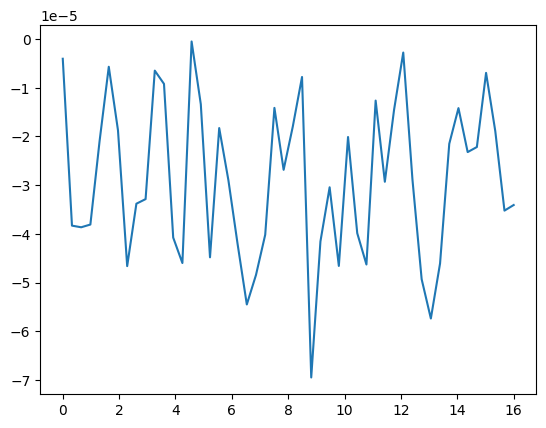

In [181]:
plt.plot(x, y)

max(instance.weights)

In [8]:
instance.weights

array([17, 28, 25, 19,  9, 17, 35, 29, 18,  1])

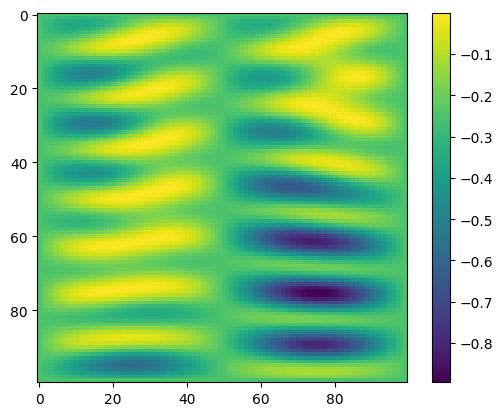

In [153]:
dg = instance.quad_penalty_cost(16)
cost = instance.masked_cost()

x = np.isclose(cost.min_val, cost.to_numpy()).astype(float)
x /= np.sum(x)
cost2 = Diagonals.from_numpy(-x)

betas = np.linspace(0, np.pi, 100)
gammas = np.linspace(0, np.pi, 100)

X, Y = np.meshgrid(betas, gammas)

res = multi_energy(dg, cost2, np.expand_dims(X.flatten(), -1), np.expand_dims(Y.flatten(), -1))
d = plt.imshow(res.reshape(X.shape))
plt.colorbar(d)

In [195]:
from problems import IntegerKnapsackPisinger

In [232]:
data = IntegerKnapsackPisinger.get_instances()[20]

def num_feas(instance):
    c, w = instance.diagonalized()
    return (w >= 0).to_numpy().sum()

def penalty(instance):
    instance.quad_penalty_cost()
    return instance._penalty

feas = [num_feas(d) for d in data]
pen = [penalty(d) for d in data]

In [237]:
np.argmax(pen)

88

In [239]:
data[88].weights.max()

930